In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,t_train),(x_test,t_test) = mnist.load_data()

print('\n train shape = ',x_train.shape,
     ', train label shape=',t_train.shape )
print('\n test shape = ',x_test.shape,
      ', test label shape=',t_test.shape )

print('\n train label = ', t_train) #학습데이터 정답 출력
print(' test label = ', t_test) #테스트데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape= (60000,)

 test shape =  (10000, 28, 28) , test label shape= (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label =  [7 2 1 ... 4 5 6]


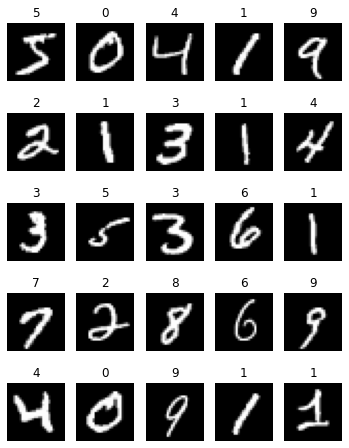

In [3]:
import matplotlib.pyplot as plt

#25개의 이미지 출력
plt.figure(figsize=(6,8)) #가로 세로

for index in range(25): #25개 이미지 출력
    plt.subplot(5,5, index+1)  # 5행 5열
    plt.imshow(x_train[index],cmap='gray')
    plt.axis('off')
    plt.title(str(t_train[index]))
plt.show()

2


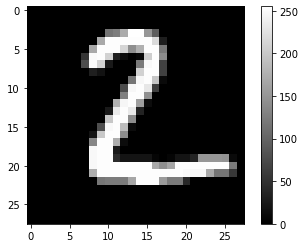

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [4]:
print(t_test[1])
plt.imshow(x_test[1],cmap='gray')
plt.colorbar()
plt.show()
print(x_test[1])

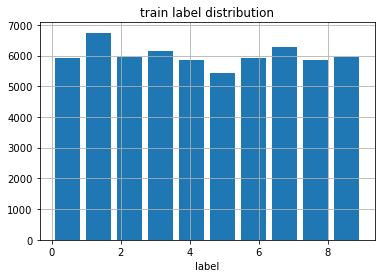

In [5]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train,bins=10,rwidth=0.8) #0-9까지므로 bins=10 rwidth=막대바 너비 (1이 최대)
plt.show()

In [6]:
#학습데이터 정답 분포 확인
label_distribution = np.zeros(10)
for idx,val in enumerate(t_train):
    label= int(val)
    label_distribution[label]+=1
print(label_distribution) #실제 값 분포도

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [7]:
# 학습데이터 / 테스트 데이터 정규화 (Normalization)
# x : 0~255 => 0~1로 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

# 훈련을 위해서 배열형태로 만들어줌
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [10]:
print(t_train[0]) #5
print(t_test[0]) #7

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #2차원=>1차원
model.add(tf.keras.layers.Dense(100,activation='relu')) #출력 100개 relu= 마이너스값이 나왔을 때 다른 값으로 변환 sigmoid의 확장
model.add(tf.keras.layers.Dense(10,activation='softmax')) #출력 10개 #0-9 확률로 표기가능 softmax= 큰값을 가져옴

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', #항목이 3개 이상
              metrics=['accuracy']) #정확도
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.9095 - val_loss: 0.1847 - val_accuracy: 0.9494
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1465 - accuracy: 0.9573 - val_loss: 0.1571 - val_accuracy: 0.9547
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1032 - accuracy: 0.9690 - val_loss: 0.1191 - val_accuracy: 0.9655
Epoch 4/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0781 - accuracy: 0.9763 - val_loss: 0.1158 - val_accuracy: 0.9663
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.1091 - val_accuracy: 0.9677
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.1029 - val_accuracy: 0.9688
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.1037 - val_accuracy:

In [17]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9790


[0.10808182507753372, 0.9789999723434448]

In [18]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 948us/step


In [19]:
predictions[0] # 예측값 결과 7 : 9.99

array([5.9352371e-14, 1.5487407e-16, 2.0092135e-13, 1.4655436e-05,
       8.0468033e-20, 1.2819178e-12, 1.6780734e-23, 9.9998462e-01,
       1.1796890e-11, 6.8852773e-07], dtype=float32)

In [20]:
label=np.argmax(predictions[0])
label

7

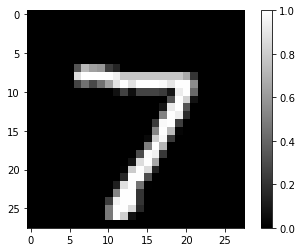

In [24]:
plt.imshow(x_test[0],cmap='gray')
plt.colorbar()
plt.show()

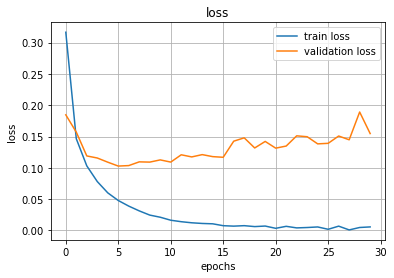

In [26]:
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss') 
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

#훈련 데이터 오버피팅 좋은 모델은 아님!

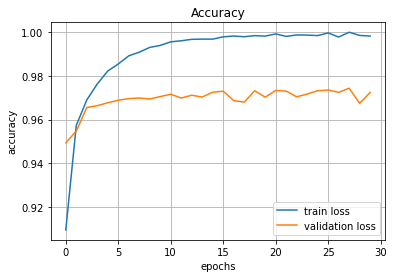

In [28]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'],label='train loss') 
plt.plot(hist.history['val_accuracy'], label='validation loss')

plt.legend(loc='best')
plt.show()

#훈련 데이터 오버피팅, 좋은 모델은 아님!

313/313 [==============================] - 0s 1ms/step


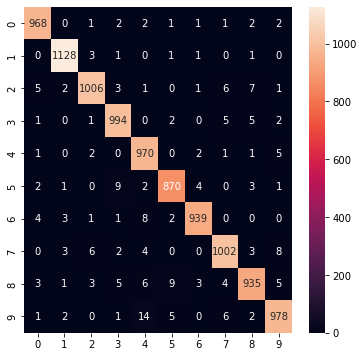

In [29]:
#얼마나 오류가 났는지 확인
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)

cm=confusion_matrix(np.argmax(t_test, axis=-1),
                    np.argmax(predicted_value,axis=-1))
sns.heatmap(cm,annot=True, fmt='d')
plt.show()